## Steps in modelling with Tensorflow
1. **Creating a model** - define the input and output layers as well as hidden layers of the deep learning model.
2. **Compiling a model** - define the loss function(a function which tells how wrong the model is) and the optimiser(tells our model how to improve the patterns and reduce loss function) and evaluation metrics(metrics for interpreting the performance of the model)
3. **Fitting a model** - letting the model finding the patterns between X and y(features and labels).

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
X = np.array([-7.0, -4.0, -1.0, 3.0, 7.0, 11.0, 14.0, 17.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Convert numpy arrays into tensors and then convert them to float32.
# This is done to prevent the warning message. In tensorflow 1 there was an issue and now it is deprecated.
# So if we want to use tensorflow 1 in tensorflow 2 we have to do this conversion. Here this conversion 
# is done just to avoid the warning message.

X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  3.,  7., 11., 14., 17.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

Sequential groups a linear stack of layers into tf.keras.Model  

In [3]:
# Set a seed
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)         
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model 
# epochs ------> How many times the model will go through the training samples.
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 497ms/step - loss: 10.6497 - mae: 10.6497
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3897 - mae: 10.3897
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1297 - mae: 10.1297
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.8697 - mae: 9.8697
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 9.6097 - mae: 9.6097
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3497 - mae: 9.3497
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0897 - mae: 9.0897
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.8297 - mae: 8.8297
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.5697 - mae: 8.5697
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.3097 - mae: 8.3097
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss:

In [4]:
X,y 

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  3.,  7., 11., 14., 17.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [5]:
# Try and make a prediction using our model
model.predict([20.0])

array([[29.701248]], dtype=float32)

### Improving our model
The model can be improved by altering the steps taken to construct the model.
1. **Creating a model**   - More layers can be added, more hidden units(neurons) inside the hidden layers can be added, **activation function** of each layer can be changed.
2. **Compiling a model**   - The optimisation could be changed or the **learning rate** of the optimisation can be changed.
3. **Fitting a model**   - Increase the number of epochs(leave it training for longer) or on more data(give the model more examples to learn from)

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1)                            
])

model.compile(
  loss = "mae",
  optimizer = tf.keras.optimizers.SGD(),
  metrics = ["mae"])

model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 329ms/step - loss: 13.3582 - mae: 13.3582
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2844 - mae: 12.2844
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2529 - mae: 11.2529
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1555 - mae: 10.1555
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9172 - mae: 8.9172
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 7.5189 - mae: 7.5189
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 5.8421 - mae: 5.8421
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 3.7323 - mae: 3.7323
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 4.3247 - mae: 4.3247
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 3.4627 - mae: 3.4627
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - l

Suppose there are 2 models. Model 1 has an MAE of 6 and model 2 has an MAE of 3. But we cant always say that Model 2 is better than model1. Model 2 might have got better MAE than model 1 because it could have overfitted the data(Tweak the model so much to fit the training data perfectly by performing poorly in testing data). So, We have to predict the variable and check by how much the predicted value and the actual values are differing. Then we have to come to a conclusion.

Learning rate is the most important hyperparameter. Providing optimal learning rates would give excellent results. The default learning rate is 0.001 and it didnt give good results. So we tweaked the learning rate to 0.01 and got excellent results.

In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50,activation="relu"),
  tf.keras.layers.Dense(1)
])

model.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ["mae"]
)
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 395ms/step - loss: 11.7133 - mae: 11.7133
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9375 - mae: 10.9375
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1196 - mae: 10.1196
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 9.2993 - mae: 9.2993
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 8.4688 - mae: 8.4688
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 7.6290 - mae: 7.6290
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 6.7721 - mae: 6.7721
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 6.0092 - mae: 6.0092
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 5.2386 - mae: 5.2386
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 4.4503 - mae: 4.4503
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss:

In [8]:
# the actual value is 27.0 and we got 27.11 which is very close
model.predict([20.0])

array([[26.403263]], dtype=float32)

### Evaluating the model
For Evaluating purposes visualisation can be very efficient
1. The data - what data are we working with? What does it look like.
2. The model itself - what does our model look like?
3. The training of a model - how does a model perform while it learns?
4. The predictions of the model - how do the predictions of the model line up against actual values

In [9]:
# More data is required to train the model in a better way
X = tf.range(-100,100,4)
X 

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [10]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

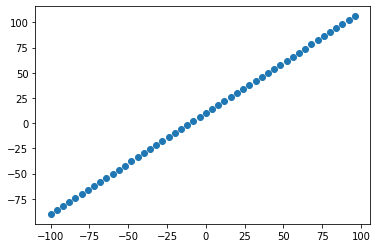

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

* **Training set** - the model learns from this data, which is typically 70-80% of the total data.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available. 
* **Test set** - the model gets evaluated on this data to test what it has learnt, this is typically 10-15% of the data available.

Generalisation - The ability for a machine learning model to perform well on data that it hasn't seen before.

In [12]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

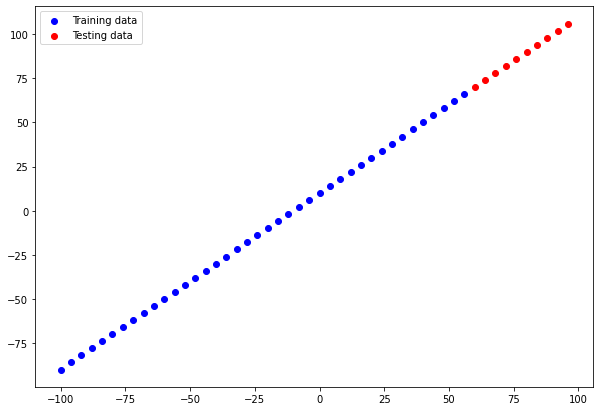

In [13]:
# After train, test splitting let's vizualise again
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c='b',label="Training data")
plt.scatter(X_test,y_test,c='r',label="Testing data")
plt.legend();

Let's visualize the model

In [14]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(
  loss = "mae",
  optimizer=tf.keras.optimizers.SGD(),
  metrics=["mae"]
)

# model.fit(X_train, y_train)

In [15]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa1196f1450>>

We are getting this error because we havent fit the model yet but are trying to visualize it. In this case we have 3 options, first is calling the build() function and building the model and the second one is calling the fit() function by providing some data. The last option is to provide the input_shape argument in the first layer for automatic build.

In [16]:
# These are both scalar values so we provide [1] as input_shape argument
X_train[0], y_train[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [17]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer.
# Usually the neural networks can determine the input shape.

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10,input_shape=[1])
])

model.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.SGD(),
  metrics=["mae"]
)

In [18]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In the above case we have one hidden layer which has 10 neurons which we can see in the output shape. Also the number of params is 20 which means that each neuron has 2 trainable parameters.

* **Total params** - Total number of parameters in the model.
* **Trainable param**s - These are the parameters a model can update as it trains,
* **


** - These parameters aren't updated during training(this is typical when you have parameters from other models during **transfer learning**). 

In our case the number of non-trainable params is 0. But in certain cases we would want to import a model with already learnt patterns and data. In those cases we would freeze those learnt patterns. So we would keep those learnt patterns constant(non-trainable) and train only the patterns which we require for our problem.

In order to find the parameters in the dense layer we have something called as a weights matrix and a bias vector. 

In [19]:
model.fit(X_train,y_train,epochs=100,verbose=0)

In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [21]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10,input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(10,name="middle_layer"),
  tf.keras.layers.Dense(1,name="output_layer")
], name="model_1")

model.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.SGD(),
  metrics=["mae"]
)

model.fit(X_train, y_train,epochs=100,verbose = 0)

**Another method of visualising**

tf.keras.utils.plot_model() ----> Converts a keras model to a dot format and saves it to a file.

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
middle_layer (Dense)         (None, 10)                110       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


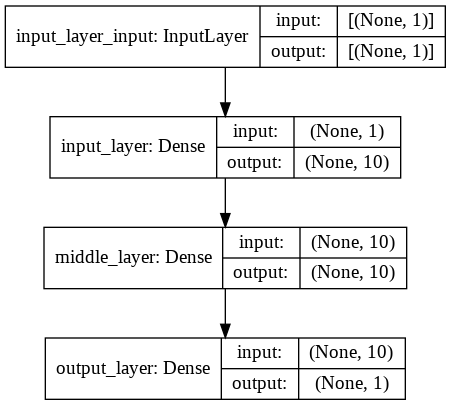

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes=True)

1. input_layer:Dense has a total of 20 parameters. ---> (input*output) + output = (1 * 10) + 10 = 20
2. middle_layer:Dense has a total of 110 parameters. ---> (input*output)+output = (10 * 10) + 10 = 110
3. output_layer:Dense has a total of 22 parameters. ---> (input *output)+output = (10 * 1) + 1 = 11 

### Visualising our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels. Often we will see in the form of y_test or y_true versus y_pred(ground truth versus your model's predictions).

In [24]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10,input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1,name="output_layer")
], name="model_2")

model.compile(
  loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.SGD(),
  metrics=["mae"]
)

model.fit(X_train, y_train,epochs=100,verbose = 0)

In [25]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [26]:
# perform predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [27]:

y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [28]:
# Plotting functions
def plot_predictions(train_data = X_train, train_label = y_train, test_data = X_test, test_label=y_test, predictions = y_pred):
  plt.figure(figsize= (10,7))
  plt.scatter(train_data, train_label, c="b", label="Training data")
  plt.scatter(test_data, test_label, c='g', label="Testing data")
  plt.scatter(test_data,predictions, c="r", label="predicted data")
  plt.legend();

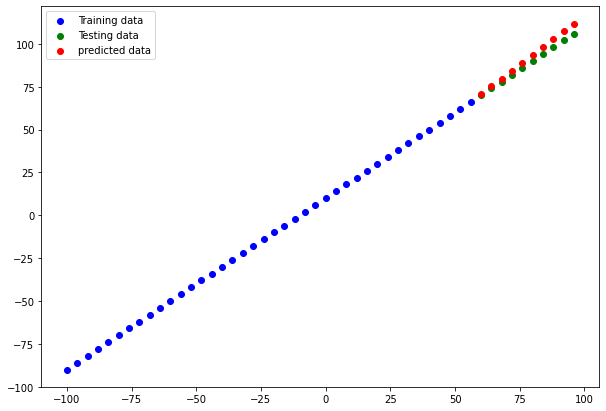

In [29]:
# For this image only testing and predicted data are plotted. Training data is commented
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

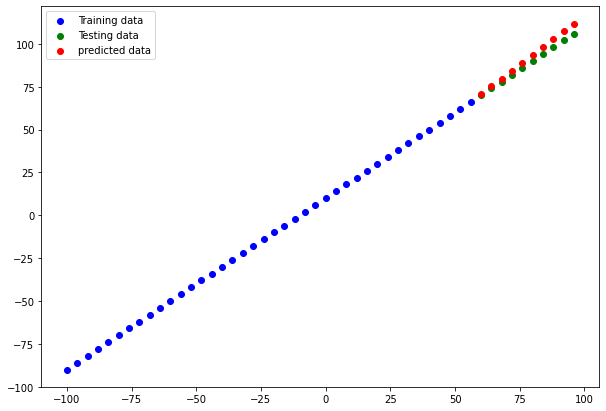

In [30]:
# For this image all testing, training and predicted data are plotted
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

### Evaluating model's predictions with regression evaluation metrics
Depending on the problem we are working on, there will be different evaluation metrics to evaluate your model's performance. 

Since we are working on a regression problem, there are three main metrics.
1. MAE - Mean absolute error(on avg how wrong is the model's predictions)
2. MSE - mean squared error("square the average errors")
3. Huber - combination of MAE and MSE. Less sensitive to outliers than MSE.


MAE = 1/n(abs(observed-predicted))

MSE = 1/n(squared(observed-predicted))


* MAE - starter metric for any regression problem
* MSE- When larger errors are more significant than smaller errors. Because of the squared component it amplifies larger errors. For example for a case getting an MAE of 10 is fine but getting an MAE of 100 is a catestrophy. Then in those cases we have to use MSE because it amplifies the error so much and we can easily drop the model or identify outliers which has caused this huge increase.



In [31]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 120ms/step - loss: 3.1969 - mae: 3.1969


[3.1969451904296875, 3.1969451904296875]

In [32]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

We dont get a single value because y_test and y_pred are not in the same dimensions.

In [33]:
y_pred = tf.squeeze(y_pred)

In [34]:
# Now we get a single value
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [35]:
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

An important part of machine learning is to track the results of the experiments. There are a few tools which are available for tracking.
1. TensorBoard - a component of the Tensorflow's library to help tracking modelling experiments.
2. Weights and biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

TensorBoard - Tensorflow's visualisation toolkit.
1. Tracking and visualising metrics such as loss and accuracy.
2. Visualising the model graph(ops and layers)
3. Viewing histograms of weights, biases or other tensors as they change over time.





### Saving our models
There are 2 ways in which we can save the models
1. The SavedModel format
2. The HDF5 format

In [36]:
# Save model using SavedModel format
model.save("DL_2_best_model_SavedModel_format")

INFO:tensorflow:Assets written to: DL_2_best_model_SavedModel_format/assets


In [37]:
# Save model using HDF5 format
model.save("DL_2_best_model_HDF5_format.h5")

### Loading a saved model
After loading we can compare the summary or MAE/MSE or predictions for checking whether the loaded model is the same as that of the original model.

In [38]:
# Load the model saved in SavedModel format
loaded_savedModel_format = tf.keras.models.load_model("DL_2_best_model_SavedModel_format")
loaded_savedModel_format.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Load the model saved in HDF5 model
loaded_h5_model = tf.keras.models.load_model("DL_2_best_model_HDF5_format.h5")
loaded_h5_model.summary() 

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
